In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')

In [2]:
td = pd.read_csv('../_data/titanic/train.csv')
valid_paras = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [3]:
survived_lines = td[td['Survived'] != 0]
dead_lines = td[td['Survived'] == 0]

Text(0.5, 1.0, 'Dead Fare')

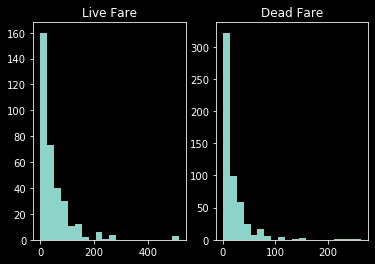

In [4]:
sur_fare = survived_lines['Fare']
dead_fare = dead_lines['Fare']
plt.subplot(121)
plt.hist(sur_fare, bins=20)
plt.title('Live Fare')
plt.subplot(122)
plt.hist(dead_fare, bins=20)
plt.title('Dead Fare')

Text(0.5, 1.0, 'Age')

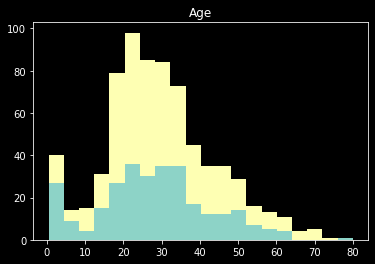

In [5]:
survived_age = survived_lines['Age']
dead_age = dead_lines['Age']
plt.hist([survived_age, dead_age], bins=20, stacked=True)
plt.title('Age')

Text(0.5, 1.0, 'Pclass')

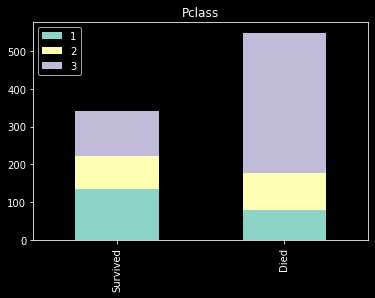

In [6]:
survived_class = survived_lines['Pclass'].value_counts()
dead_class = dead_lines['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class, dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True)
plt.title('Pclass')

Text(0.5, 1.0, 'Sex')

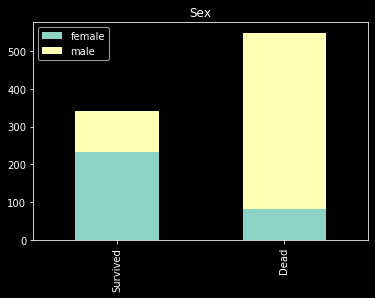

In [7]:
survived_sex = survived_lines['Sex'].value_counts()
dead_sex = dead_lines['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex, dead_sex], ['Survived', 'Dead'])
df_sex.plot(kind='bar', stacked=True)
plt.title('Sex')

Text(0.5, 1.0, 'Embarked')

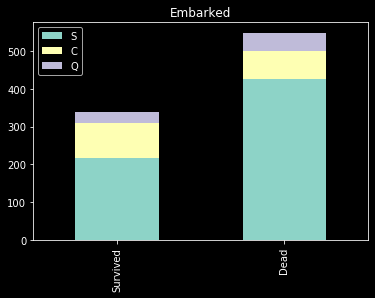

In [8]:
survived_Embarked = survived_lines['Embarked'].value_counts()
dead_Embarked = dead_lines['Embarked'].value_counts()
df_Embarked = pd.DataFrame([survived_Embarked, dead_Embarked], ['Survived', 'Dead'])
df_Embarked.plot(kind='bar', stacked=True)
plt.title('Embarked')


In [9]:
td['title'] = td['Name'].str.split('[,.]\s+').str[1]
title_average_age = td.groupby('title').mean()['Age']
for i in range(td.shape[0]):
    if np.isnan(td['Age'][i]):
        td['Age'][i] = title_average_age[td['title'][i]]

<ipython-input-9-410d2acc15f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['Age'][i] = title_average_age[td['title'][i]]


In [10]:
td['EmbarkedC'] = (td['Embarked'] == 'C')
td['EmbarkedQ'] = (td['Embarked'] == 'Q')
td['isMale'] = (td['Sex'] == 'male')
X = td[['Pclass', 'isMale', 'Fare', 'Age', 'EmbarkedC', 'EmbarkedQ']]
y = td['Survived']


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim


In [12]:
from sklearn.preprocessing import normalize

net_td = X.copy().to_numpy(dtype=np.float)
net_td = normalize(net_td, axis=0, norm='max')

In [21]:
fcNet = nn.Sequential(
    nn.Linear(6, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.ReLU(),
    nn.Linear(20, 2),
    nn.Softmax()
)

import time

batch_size = 100
epochs = 100
lr = 1e-2
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(fcNet.parameters(), lr=1e-2, momentum=0.9)
test_index_start = int( net_td.shape[0] * .85 / batch_size ) * batch_size


In [14]:
def test_accuracy():
    with torch.no_grad():
        inputs = torch.tensor(net_td[test_index_start:, :], dtype=torch.float)
        labels = y[test_index_start:].to_numpy()
        outputs = fcNet(inputs).numpy()
        predicted = np.argmax(outputs, axis=1)
        wrong = np.logical_xor(predicted, labels).sum()
        print(f'\nGuess {len(inputs) - wrong} out of {len(inputs)}\n')
    
test_accuracy()
    


Guess 120 out of 191



c:\_devtools\python\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [24]:
    
time_start = time.time()
for epoch in range(epochs):
    i = 0
    while i * batch_size < net_td.shape[0]:
        inputs = torch.tensor(net_td[i * batch_size: (i + 1) * batch_size, :], dtype=torch.float)
        labels = torch.tensor(     y[i * batch_size: (i + 1) * batch_size].to_numpy())
        output = fcNet(inputs)
        loss = loss_func(output, labels)
        # print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        i += 1
        print('\r' + 
              f'epoch={epoch + 1}, batch={i + 1}, time={(time.time()-time_start):.5} secs', 
              end='')
    test_accuracy()
    # test_net()
        

epoch=1, batch=10, time=0.017957 secs
Guess 158 out of 191

epoch=2, batch=10, time=0.037957 secs
Guess 158 out of 191

epoch=3, batch=10, time=0.056948 secs
Guess 158 out of 191

epoch=4, batch=10, time=0.071949 secs
Guess 158 out of 191

epoch=5, batch=10, time=0.086954 secs
Guess 158 out of 191

epoch=6, batch=10, time=0.10095 secs
Guess 158 out of 191

epoch=7, batch=10, time=0.11847 secs
Guess 158 out of 191

epoch=8, batch=10, time=0.13247 secs
Guess 158 out of 191

epoch=9, batch=10, time=0.14547 secs
Guess 158 out of 191

epoch=10, batch=10, time=0.15847 secs
Guess 158 out of 191

epoch=11, batch=10, time=0.17047 secs
Guess 158 out of 191

epoch=12, batch=10, time=0.18347 secs
Guess 158 out of 191

epoch=13, batch=10, time=0.20047 secs
Guess 158 out of 191

epoch=14, batch=10, time=0.21847 secs
Guess 158 out of 191

epoch=15, batch=10, time=0.23647 secs
Guess 158 out of 191

epoch=16, batch=10, time=0.25247 secs
Guess 158 out of 191

epoch=17, batch=10, time=0.26747 secs
Guess 

In [54]:
ttd = pd.read_csv('../_data/titanic/test.csv')

ttd['title'] = ttd['Name'].str.split('[,.]\s+').str[1]
title_average = ttd.groupby('title').mean()
title_average.loc['Ms', 'Age'] = 20.
for i in range(ttd.shape[0]):
    if np.isnan(ttd['Age'][i]):
        ttd['Age'][i] = title_average['Age'][ttd['title'][i]]
    if np.isnan(ttd['Fare'][i]):
        ttd['Fare'][i] = title_average['Fare'][ttd['title'][i]]

ttd['EmbarkedC'] = (ttd['Embarked'] == 'C')
ttd['EmbarkedQ'] = (ttd['Embarked'] == 'Q')
ttd['isMale'] = (ttd['Sex'] == 'male')
X = ttd[['Pclass', 'isMale', 'Fare', 'Age', 'EmbarkedC', 'EmbarkedQ']]

net_ttd = X.copy().to_numpy(dtype=np.float)
net_ttd = normalize(net_ttd, axis=0, norm='max')

inputs = torch.tensor(net_ttd, dtype=torch.float)
outputs = fcNet(inputs).detach().numpy()
predicted = np.argmax(outputs, axis=1)

result = pd.DataFrame(data={
    'PassengerId': ttd.PassengerId,
    'Survived': predicted
})

result.to_csv('result.csv', index=False)
print('ok')

ok


<ipython-input-54-a859ff6f24af>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttd['Age'][i] = title_average['Age'][ttd['title'][i]]
<ipython-input-54-a859ff6f24af>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttd['Fare'][i] = title_average['Fare'][ttd['title'][i]]
c:\_devtools\python\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
